In [65]:
import numpy as np
import json

In [10]:
with open('MPHYG001_files/python_language_1/python_language_1_data.csv', 'r') as f:
    data = np.genfromtxt(f, delimiter=",", names=['year','day','rainfall'])

In [11]:
data

array([(  nan,  nan,    nan), (1937.,   1., 30.226),
       (1937.,   2., 52.832), ..., (2012., 364.,  4.318),
       (2012., 365.,  0.   ), (2012., 366.,  0.   )],
      dtype=[('year', '<f8'), ('day', '<f8'), ('rainfall', '<f8')])

In [12]:
type(data)

numpy.ndarray

In [13]:
years = range(1937, 2012)
diction = {}
for year in years:
    rainfall = []
    for row in data:
        if row[0] == year:
            rainfall.append(row[2])
    diction[year] = rainfall

In [14]:
diction[1980]

[7.112,
 0.0,
 0.0,
 15.494,
 0.0,
 0.0,
 13.462,
 0.0,
 6.35,
 0.0,
 27.432,
 0.0,
 9.398,
 8.128,
 0.0,
 0.254,
 9.652,
 12.7,
 0.0,
 0.0,
 0.0,
 33.782,
 0.0,
 0.0,
 0.0,
 0.0,
 1.016,
 0.0,
 0.0,
 21.844,
 5.588,
 0.0,
 0.0,
 0.0,
 0.0,
 2.54,
 4.318,
 0.0,
 1.016,
 22.352,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 8.382,
 8.636,
 0.0,
 0.0,
 0.0,
 3.556,
 5.588,
 0.762,
 0.0,
 0.0,
 0.508,
 0.0,
 0.0,
 0.0,
 0.0,
 9.398,
 2.54,
 0.0,
 10.922,
 44.196,
 0.0,
 44.45,
 26.162,
 0.0,
 2.794,
 0.0,
 22.606,
 10.414,
 0.0,
 0.0,
 0.0,
 78.994,
 0.762,
 1.27,
 73.66,
 16.764,
 0.0,
 0.0,
 27.178,
 0.0,
 0.0,
 0.0,
 51.054,
 0.0,
 9.652,
 0.0,
 0.0,
 0.0,
 0.0,
 6.858,
 0.0,
 0.0,
 1.016,
 72.898,
 0.0,
 0.0,
 0.0,
 37.338,
 45.974,
 16.256,
 2.54,
 0.508,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.81,
 0.0,
 11.176,
 9.906,
 1.016,
 1.524,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.334,
 0.0,
 9.398,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.508,
 3.302,
 0.0,
 0.0,
 89.154,
 0.0,
 8.128,
 15.494,
 0.0,
 23.368,
 1

In [15]:
def data_to_dict(filepath, destination):
    with open(filepath, 'r') as f:
        data = np.genfromtxt(f, delimiter=",", names=['year','day','rainfall'])
    years = range(1937, 2012)
    diction = {}
    for year in years:
        rainfall = []
        for row in data:
            if row[0] == year:
                rainfall.append(row[2])
        diction[year] = rainfall
        
    with open(destination, 'w') as json_file:
        json.dump(diction, json_file, indent=4)

In [16]:
data_to_dict('MPHYG001_files/python_language_1/python_language_1_data.csv', 'dictionary.json')

In [17]:
from matplotlib import pyplot as plt

In [18]:
with open('dictionary.json', 'r') as f:
    mydata = f.read()
    mydict = json.loads(mydata)

In [19]:
def make_plot(filename, year, color="blue"):
    with open(filename, 'r') as f:
        mydata = f.read()
        mydict = json.loads(mydata)
    rainfall = mydict[year]
    days = range(len(rainfall))
    plt.plot(days, rainfall, color)
    plt.xlabel("Day of year")
    plt.ylabel("Rainfall (mm)")
    plt.title("Daily rainfall")

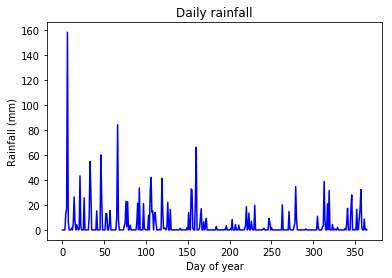

In [20]:
make_plot('dictionary.json', "1998")
plt.savefig('1998.png')

In [21]:
from statistics import mean 

In [22]:
def mean_for_year(filename, year):
    with open(filename, 'r') as f:
        mydata = f.read()
        mydict = json.loads(mydata)
    rainfall = mydict[year]
    return mean(rainfall)

In [23]:
mean_for_year('dictionary.json', "1998")

4.776465753424658

In [24]:
def mean_for_period(filename, start, end):
    with open(filename, 'r') as f:
        mydata = f.read()
        mydict = json.loads(mydata)
    period = range(int(start), int(end)+1)
    rain_data = []
    for year in list(period):
        rainfall = mydict[str(year)]
        mean_rainfall = mean(rainfall)
        rain_data.append(mean_rainfall)
    plt.plot(list(period), rain_data)
    plt.xlabel("Year")
    plt.ylabel("Mean rainfall for year (mm)")
    plt.title("Yearly mean rainfall over given period")

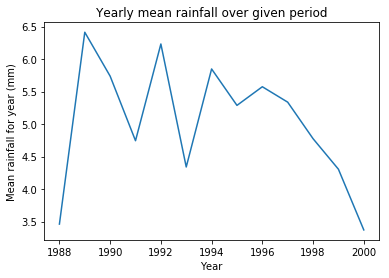

In [28]:
mean_for_period('dictionary.json', "1988", "2000")
plt.savefig('1988-2000.png')

In [30]:
import math

In [37]:
correction = 1.2**(math.sqrt(2))
correction

1.2941338353151037

In [40]:
def apply_correction(value):
    correction = 1.2**(math.sqrt(2))
    return value*correction

In [42]:
apply_correction(8)

10.35307068252083

In [61]:
def apply_to_year_1(filename, year):
    correction = 1.2**(math.sqrt(2))
    with open(filename, 'r') as f:
        mydata = f.read()
        mydict = json.loads(mydata)
    rainfall = mydict[year]
    new_list = []
    for element in rainfall:
        new_list.append(apply_correction(element))
    return new_list

In [62]:
apply_to_year('dictionary.json', "2005")

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.6435499708501817,
 0.9835417148394788,
 12.824866307972679,
 0.0,
 0.0,
 0.0,
 0.0,
 70.34911528772903,
 1.9670834296789577,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9835417148394788,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 34.51454938785382,
 0.0,
 0.0,
 0.0,
 18.739057935362702,
 10.521308081111794,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.6270916856896602,
 0.0,
 0.0,
 0.0,
 12.488391510790752,
 19.72259965020218,
 0.0,
 2.9635664828715877,
 0.0,
 0.0,
 0.0,
 21.689683079881142,
 49.306499125505454,
 0.0,
 0.0,
 20.382607906212883,
 0.0,
 0.0,
 13.47193322563023,
 13.148399766801454,
 0.0,
 0.0,
 0.0,
 0.0,
 1.9670834296789577,
 0.0,
 32.87099941700363,
 15.115483196480412,
 0.0,
 0.0,
 0.0,
 0.0,
 5.914191627390024,
 2.6270916856896602,
 0.0,
 13.148399766801454,
 8.541283313079685,
 0.0,
 0.0,
 0.0,
 0.0,
 30.903915987324677,
 18.739057935362702,
 0.0,
 0.0,
 0.0,
 51.273582555184404,
 23.99324130674202,
 0.0,
 0.0,
 21.689683079881142,
 15.77549145249111

In [63]:
def apply_to_year_2(filename, year):
    """
    Apply correction factor to all of the data for a given year, using list comprehension.
    The list comprehension method is quicker because it does not need to call the append function and load the new_list for every element.
    However, the list comprehension is less readable than the for-loop in apply_to_year_1.
    """
    correction = 1.2**(math.sqrt(2))
    with open(filename, 'r') as f:
        mydata = f.read()
        mydict = json.loads(mydata)
    rainfall = mydict[year]
    new_list = [apply_correction(element) for element in rainfall]
    return new_list

In [64]:
apply_to_year_2('dictionary.json', "2005")

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.6435499708501817,
 0.9835417148394788,
 12.824866307972679,
 0.0,
 0.0,
 0.0,
 0.0,
 70.34911528772903,
 1.9670834296789577,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9835417148394788,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 34.51454938785382,
 0.0,
 0.0,
 0.0,
 18.739057935362702,
 10.521308081111794,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.6270916856896602,
 0.0,
 0.0,
 0.0,
 12.488391510790752,
 19.72259965020218,
 0.0,
 2.9635664828715877,
 0.0,
 0.0,
 0.0,
 21.689683079881142,
 49.306499125505454,
 0.0,
 0.0,
 20.382607906212883,
 0.0,
 0.0,
 13.47193322563023,
 13.148399766801454,
 0.0,
 0.0,
 0.0,
 0.0,
 1.9670834296789577,
 0.0,
 32.87099941700363,
 15.115483196480412,
 0.0,
 0.0,
 0.0,
 0.0,
 5.914191627390024,
 2.6270916856896602,
 0.0,
 13.148399766801454,
 8.541283313079685,
 0.0,
 0.0,
 0.0,
 0.0,
 30.903915987324677,
 18.739057935362702,
 0.0,
 0.0,
 0.0,
 51.273582555184404,
 23.99324130674202,
 0.0,
 0.0,
 21.689683079881142,
 15.77549145249111